# Spam Email Classification

Submitted by Arjie Cristobal

In [1]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

# Importing functions from another jupyter notebook
!pip install nbimporter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nbimporter
import spambase_dataset_loader_nb
import spambase_model_helper_nb

## Data Preparation:

### Load the datasets:

In [3]:
loader = spambase_dataset_loader_nb.SpambaseDatasetLoader()

init Loader notebook


In [4]:
help(loader.load_dataset)

Help on method load_dataset in module spambase_dataset_loader_nb:

load_dataset(url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data') method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (string) --> None
    
    This function retrieves the spambase.data from University of California Irvine (UCI) - Dataset Repository
    and save into two files:
    
    1. spambase_all.csv - The CSV file that contains all the rows from spambase.data.
    2. spambase_balance.csv - The CSV file that rows balance between spam and not spam records.



In [5]:
loader.load_dataset()

Loading dataset.
Loading spambase_all.csv completed.
Loading spambase_balance.csv completed.


In [6]:
spambase_all = loader.get_full_dataset()

get_full_dataset


### Data Exploration

#### Explore the data using info() and describe() and head()

In [7]:
spambase_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target_spam_nonspam         4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4601 non-null   float64
 4   word_freq_3d                4601 non-null   float64
 5   word_freq_our               4601 non-null   float64
 6   word_freq_over              4601 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4601 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [8]:
spambase_all.describe()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.394045,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.488698,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,1.000000,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,1.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [9]:
spambase_all.head(5)

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


#### Check for null values.

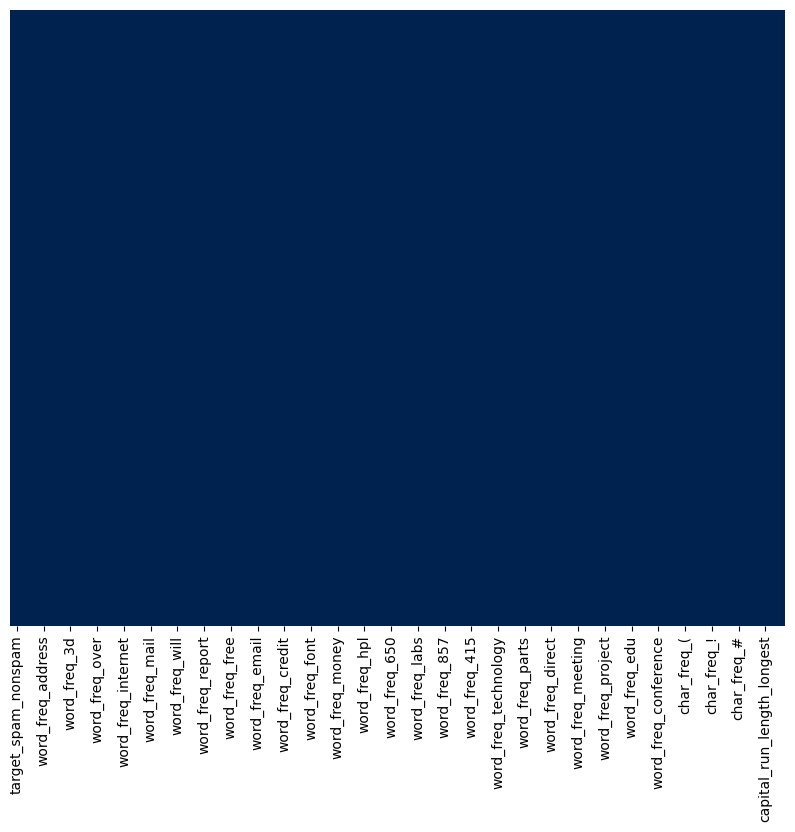

In [10]:
plt.figure(figsize=(10, 8))

ax = plt.axes()
sns.heatmap(spambase_all.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="cividis")
plt.savefig('./images/null_check.png')

#### Check for na

In [11]:
spambase_all.isna().any()

target_spam_nonspam           False
word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george            

#### Check for data imbalance

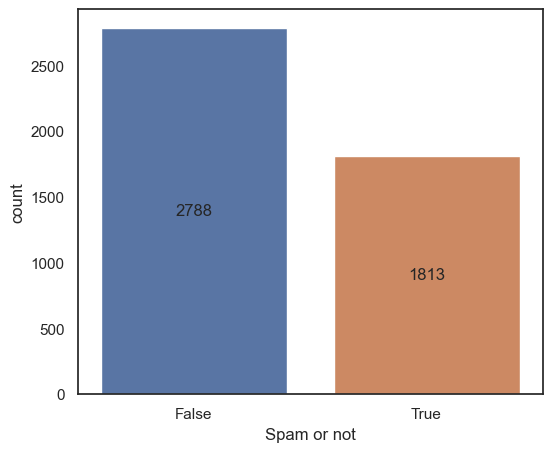

In [12]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')

spambase_all_exp = spambase_all.copy()
spambase_all_exp["target_spam_nonspam"] = spambase_all_exp["target_spam_nonspam"].astype(bool)

ax = sns.countplot(x='target_spam_nonspam', data=spambase_all_exp) 
ax.set(xlabel='Spam or not')

plt.bar_label(ax.containers[0], label_type='center')
plt.savefig('./images/imbalance_dataset.png')

#### Explore for Correlations
The large number of features makes it difficult to determine the correlations.

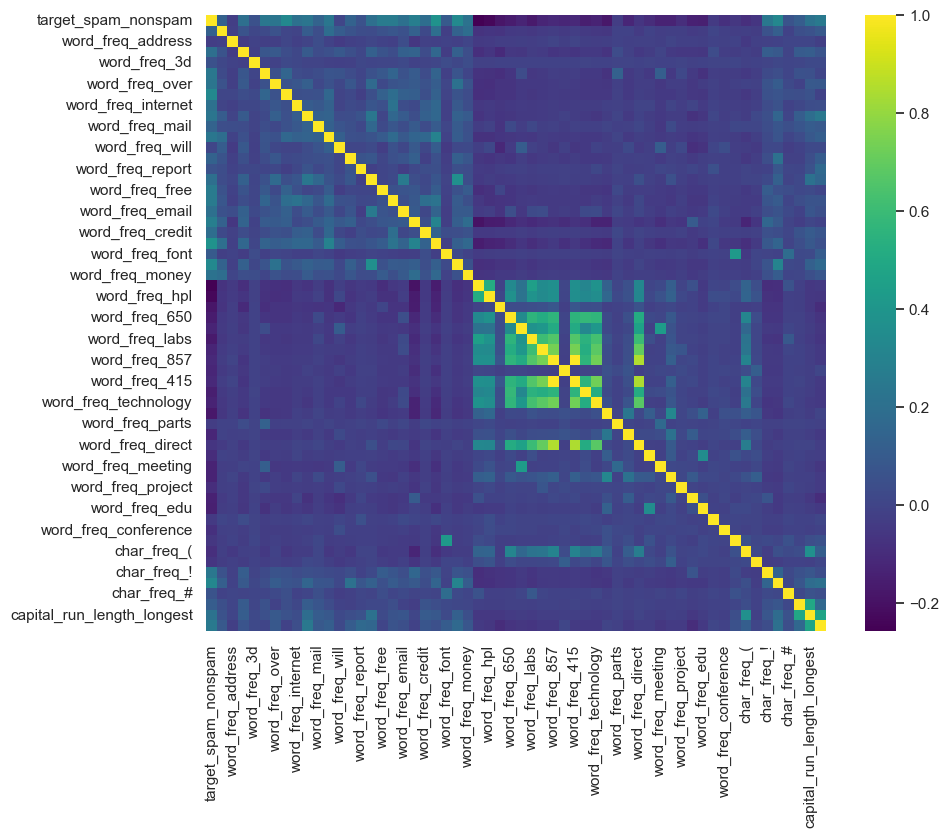

In [13]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(spambase_all_exp.corr(), cmap='viridis')
plt.savefig('./images/correlation_heatmap.png')

### Challenges
* Imbalance Binary Classification
* Large number of features

### Solutions

#### Pandas Undersampling for Imbalanced Binary Classification

In [14]:
spam = spambase_all[spambase_all['target_spam_nonspam']==1]
non_spam = spambase_all[spambase_all['target_spam_nonspam']==0]
non_spam = non_spam.sample(n=len(spam), random_state=101)
spambase_balance = pd.concat([spam, non_spam],axis=0)  

# an alternative is simply use the loader.get_balance_dataset()
# since SpambaseDatasetLoader already handled the undersampling during load.

spambase_balance = loader.get_balance_dataset()

get_balance_data


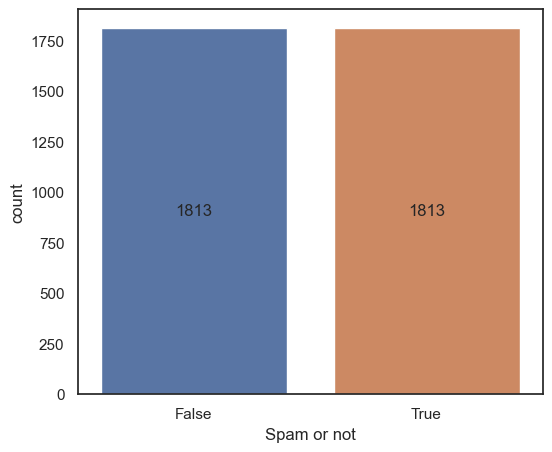

In [15]:
spambase_balance_exp = spambase_balance.copy()
spambase_balance_exp["target_spam_nonspam"] = spambase_balance_exp["target_spam_nonspam"].astype(bool)

sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')
ax = sns.countplot(x='target_spam_nonspam', data=spambase_balance_exp) 
ax.set(xlabel='Spam or not')
plt.bar_label(ax.containers[0], label_type='center')

plt.savefig('./images/balance_dataset.png')

#### Feature Selection

In [16]:
help(loader.perform_feature_selection)

Help on method perform_feature_selection in module spambase_dataset_loader_nb:

perform_feature_selection(data, feature_selection_type) method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (DataFrame, float) --> Dataframe
    
    
    This function performs feature selection based on the provided feature selection type.  
    
    Parameters
    ----------
    data: Dataframe that will be used in feature selection.
    
    feature_selection_type: The type of feature selection to be performed.
    1. stepwise_back - use stepwise backward elimination technique in feature selection..
    2. pearson - perform the feature selection using pearson correlation.
    3. chi2 - perform the feature selection using chi-squared.
    
    Returns
    ----------        
    DataFrame : The DataFrame after performing feature selection.



In [17]:
stepwise_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='stepwise_back')

The shape before feature selection: (3626, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.198765
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.200934
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200936
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200939
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200953
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200964
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200981
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.201007
    

In [18]:
pearson_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='pearson')

The shape before feature selection: (3626, 58)
Feature Selection using Pearson Correlation
The shape after feature selection: (3626, 19)


In [19]:
chi2_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='chi2')

The shape before feature selection: (3626, 58)
Feature Selection using Chi-squared
The shape after feature selection: (3626, 19)


In [20]:
print(stepwise_result[0].columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_our',
       'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_will', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_credit',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_data',
       'word_freq_85', 'word_freq_technology', 'word_freq_pm',
       'word_freq_meeting', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_conference', 'char_freq_;', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [21]:
print(pearson_result[0].columns)

Index(['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_order', 'word_freq_receive', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'char_freq_!', 'char_freq_$',
       'capital_run_length_total'],
      dtype='object')


In [22]:
print(chi2_result[0].columns)

Index(['word_freq_our', 'word_freq_remove', 'word_freq_free',
       'word_freq_business', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_lab',
       'word_freq_meeting', 'word_freq_edu', 'char_freq_!',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


## Model

### Statsmodels
The study introduced a model helper for running the test.

In [23]:
model_helper = spambase_model_helper_nb.SpambaseModelHelper()

init Model Helper notebook


In [24]:
help(model_helper.run_statsmodels_logit)

Help on method run_statsmodels_logit in module spambase_model_helper_nb:

run_statsmodels_logit(data, feature_selection_type=None, verbose=False) method of spambase_model_helper_nb.SpambaseModelHelper instance
    This function runs logistic regression based on stats models.
    
    (DataFrame, boolean, boolean) --> DataFrame
    
    Parameters
    ----------
    data: Dataframe that will be used in running the model.
    
    feature_selection_type: Type of Feature Selection to use. Available options are stepwise_back, pearson and chi2.
    verbose: True to display statsmodels summary, confusion matrix and its heatmap otherwise false.
    
    Returns
    ----------        
    DataFrame : The DataFrame of statsmodels scores.



#### Balance Dataset and Backward Elimination Technique

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.198765
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.200934
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200936
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200939
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200953
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200964
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200981
         Iterations 16
Optimization terminated successfully.
        

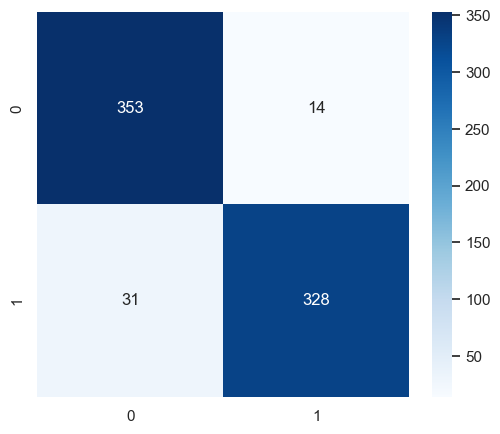

In [25]:
spambase_balance = loader.get_balance_dataset()

df_sm_stepwise_back = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='stepwise_back', verbose=True)

In [26]:
df_sm_stepwise_back

,Accuracy,Precision,Recall,F1-Score
Score,0.938017,0.961853,0.919271,0.94008


#### Balance Dataset and Pearson Correlation

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Pearson Correlation
The shape after feature selection: (3626, 19)
Optimization terminated successfully.
         Current function value: 0.270555
         Iterations 14
                              Results: Logit
Model:                  Logit                 Pseudo R-squared:   0.610    
Dependent Variable:     target_spam_nonspam   AIC:                1609.2204
Date:                   2023-07-30 23:30      BIC:                1728.6697
No. Observations:       2900                  Log-Likelihood:     -784.61  
Df Model:               19                    LL-Null:            -2010.1  
Df Residuals:           2880                  LLR p-value:        0.0000   
Converged:              1.0000                Scale:              1.0000   
No. Iterations:         14.0000                                            
---------------------------------------------------------------------

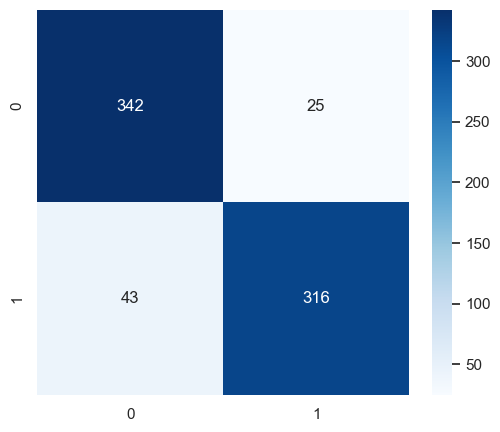

In [27]:
spambase_balance = loader.get_balance_dataset()

df_sm_pearson = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='pearson', verbose=True)

In [28]:
df_sm_pearson

,Accuracy,Precision,Recall,F1-Score
Score,0.906336,0.93188,0.888312,0.909574


#### Balance Dataset and Chi-squared

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Chi-squared
The shape after feature selection: (3626, 19)
Optimization terminated successfully.
         Current function value: 0.254574
         Iterations 14
                                Results: Logit
Model:                   Logit                  Pseudo R-squared:    0.633    
Dependent Variable:      target_spam_nonspam    AIC:                 1516.5313
Date:                    2023-07-30 23:30       BIC:                 1635.9806
No. Observations:        2900                   Log-Likelihood:      -738.27  
Df Model:                19                     LL-Null:             -2010.1  
Df Residuals:            2880                   LLR p-value:         0.0000   
Converged:               1.0000                 Scale:               1.0000   
No. Iterations:          14.0000                                              
---------------------------------------------------

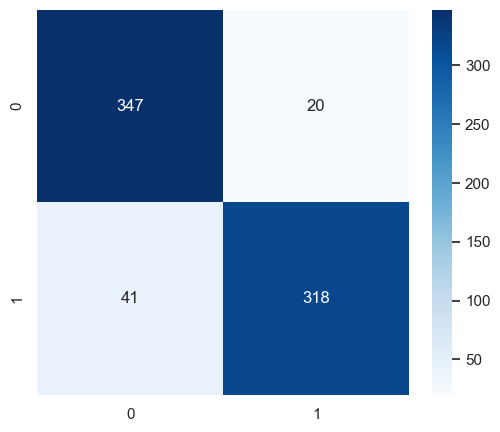

In [29]:
spambase_balance = loader.get_balance_dataset()

df_sm_chi2 = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='chi2', verbose=True)

In [30]:
df_sm_chi2

,Accuracy,Precision,Recall,F1-Score
Score,0.915978,0.945504,0.89433,0.919205


#### Balance Dataset without Feature Selection

get_balance_data
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 15
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.710    
Dependent Variable: y                AIC:              1281.4857
Date:               2023-07-30 23:30 BIC:              1627.8887
No. Observations:   2900             Log-Likelihood:   -582.74  
Df Model:           57               LL-Null:          -2010.1  
Df Residuals:       2842             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     15.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
-----------------------------------------------------------------
const     -1.2212    0.1767  -6.9123  0.0000    -1.5675   -0.8749
x1        -0.6867    0.3051  -2.2507  0.0244    -1.2847 

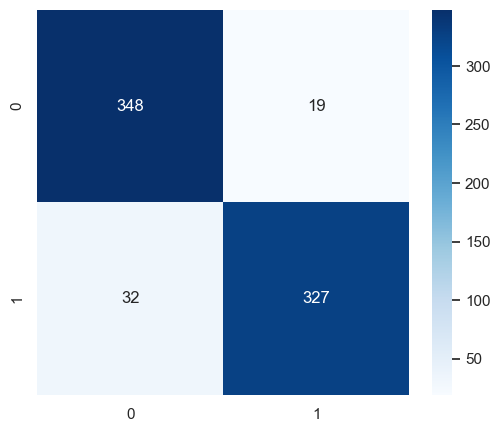

In [31]:
spambase_balance = loader.get_balance_dataset()

df_sm_none = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type=None, verbose=True)

In [32]:
df_sm_none

,Accuracy,Precision,Recall,F1-Score
Score,0.929752,0.948229,0.915789,0.931727


#### Full Dataset and Backward Elimination Technique

In [33]:
spambase_full = loader.get_full_dataset()

df_sm_full_stepwise = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='stepwise_back', verbose=False)
df_sm_full_stepwise

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.199514
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199528
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199542
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199576
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199597
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199624
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199674
         Iterations 16
Optimization terminated successfully.
        

,Accuracy,Precision,Recall,F1-Score
Score,0.932682,0.955437,0.935428,0.945326


#### Full Dataset and Pearson Correlation

In [34]:
spambase_full = loader.get_full_dataset()

df_sm_full_pearson = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='pearson', verbose=False)
df_sm_full_pearson

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Pearson Correlation
The shape after feature selection: (4601, 19)
Optimization terminated successfully.
         Current function value: 0.279534
         Iterations 10


,Accuracy,Precision,Recall,F1-Score
Score,0.892508,0.948307,0.883721,0.914875


#### Full Dataset and Chi-squared

In [35]:
spambase_full = loader.get_full_dataset()

df_sm_full_chi2 = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='chi2', verbose=False)
df_sm_full_chi2

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Chi-squared
The shape after feature selection: (4601, 19)
Optimization terminated successfully.
         Current function value: 0.237301
         Iterations 15


,Accuracy,Precision,Recall,F1-Score
Score,0.919653,0.948307,0.92201,0.934974


#### Full Dataset without Feature Selection

In [36]:
spambase_full = loader.get_full_dataset()

df_sm_full_none = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type=None, verbose=False)
df_sm_full_none

get_full_dataset
         Current function value: 0.191737
         Iterations: 35


D:\x-20a\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Accuracy,Precision,Recall,F1-Score
Score,0.926167,0.942959,0.936283,0.939609


### Result

#### Balance Dataset

In [37]:
df_bal_sm_merged = pd.concat([df_sm_stepwise_back, df_sm_pearson, df_sm_chi2, df_sm_none])

as_bal_list = df_bal_sm_merged.index.tolist()

as_bal_list[0] = 'Balance dataset and Backward Elimination'
as_bal_list[1] = 'Balance dataset and Pearson Correlation'
as_bal_list[2] = 'Balance dataset and Chi-squared'
as_bal_list[3] = 'Balance dataset without Feature Selection'
df_bal_sm_merged.index = as_bal_list

df_bal_sm_merged = df_bal_sm_merged.reset_index()
df_bal_sm_merged.rename(columns={'index': 'Models'}, inplace=True)

df_bal_sm_merged = df_bal_sm_merged.sort_values('F1-Score', ascending=False)

df_bal_sm_merged

,Models,Accuracy,Precision,Recall,F1-Score
0,Balance dataset and Backward Elimination,0.938017,0.961853,0.919271,0.940080
3,Balance dataset without Feature Selection,0.929752,0.948229,0.915789,0.931727
2,Balance dataset and Chi-squared,0.915978,0.945504,0.894330,0.919205
1,Balance dataset and Pearson Correlation,0.906336,0.931880,0.888312,0.909574


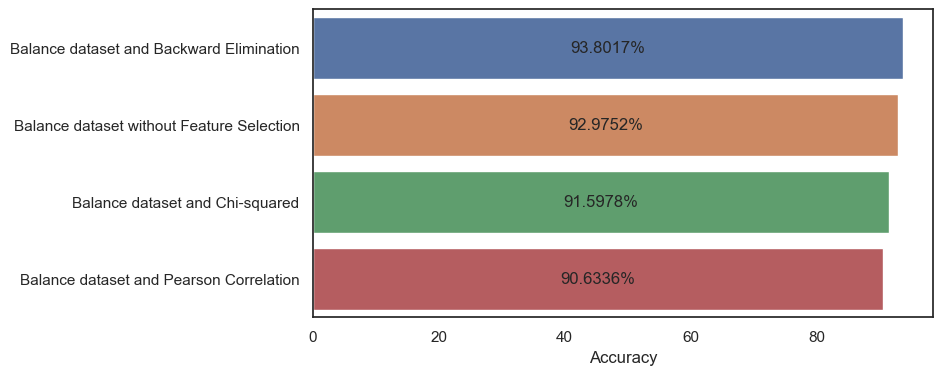

In [38]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style('white')

df_bal_sm_merged_plot = df_bal_sm_merged.copy()
df_bal_sm_merged_plot['Accuracy'] = df_bal_sm_merged_plot['Accuracy'].transform(lambda x: x * 100)
df_bal_sm_merged_plot['Precision'] = df_bal_sm_merged_plot['Precision'].transform(lambda x: x * 100)
df_bal_sm_merged_plot['Recall'] = df_bal_sm_merged_plot['Recall'].transform(lambda x: x * 100)
df_bal_sm_merged_plot['F1-Score'] = df_bal_sm_merged_plot['F1-Score'].transform(lambda x: x * 100)

ax = sns.barplot(data=df_bal_sm_merged_plot, x=df_bal_sm_merged_plot['Accuracy'], y=df_bal_sm_merged_plot['Models'], orient='h')
ax.set_ylabel('')

plt.bar_label(ax.containers[0], fmt='%.4f%%', label_type='center')
plt.savefig('./images/result_balance.png', bbox_inches='tight')

In [39]:
df_bal_sm_merged_plot

,Models,Accuracy,Precision,Recall,F1-Score
0,Balance dataset and Backward Elimination,93.801653,96.185286,91.927083,94.007989
3,Balance dataset without Feature Selection,92.975207,94.822888,91.578947,93.172691
2,Balance dataset and Chi-squared,91.597796,94.550409,89.432990,91.920530
1,Balance dataset and Pearson Correlation,90.633609,93.188011,88.831169,90.957447


##### Balance Dataset Pseudo R-squared

In [40]:
pseudo_r2_rec = {'Models': as_bal_list,
       'Pseudo R-squared': [0.695,0.610,0.633,0.710]}
pseudo_r2_df = pd.DataFrame(pseudo_r2_rec)

pseudo_r2_df = pseudo_r2_df.sort_values('Pseudo R-squared', ascending=False)
pseudo_r2_df

,Models,Pseudo R-squared
3,Balance dataset without Feature Selection,0.710
0,Balance dataset and Backward Elimination,0.695
2,Balance dataset and Chi-squared,0.633
1,Balance dataset and Pearson Correlation,0.610


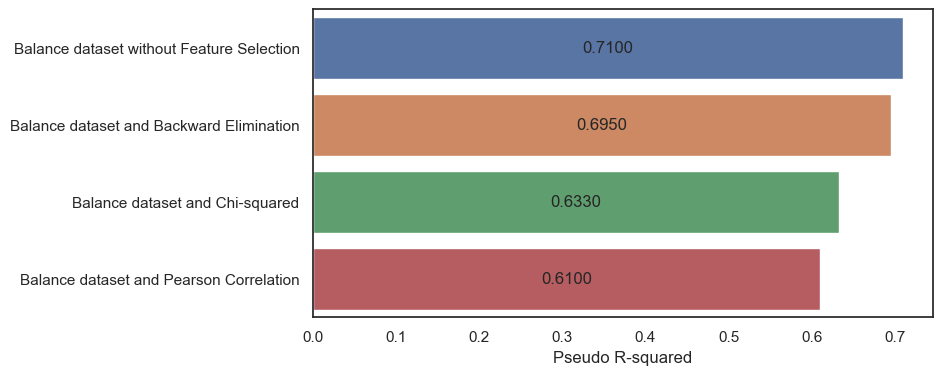

In [41]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style('white')

ax = sns.barplot(data=pseudo_r2_df, x=pseudo_r2_df['Pseudo R-squared'], y=pseudo_r2_df['Models'], orient='h')
ax.set_ylabel('')

plt.bar_label(ax.containers[0], fmt='%.4f', label_type='center') 
plt.savefig('./images/pseudo_r_squared.png', bbox_inches='tight')

#### Full Dataset

In [42]:
df_full_sm_merged = pd.concat([df_sm_full_stepwise, df_sm_full_pearson, df_sm_full_chi2, df_sm_full_none])

as_full_list = df_full_sm_merged.index.tolist()

as_full_list[0] = 'Full dataset and Backward Elimination'
as_full_list[1] = 'Full dataset and Pearson Correlation'
as_full_list[2] = 'Full dataset and Chi-squared'
as_full_list[3] = 'Full dataset without Feature Selection'
df_full_sm_merged.index = as_full_list

df_full_sm_merged = df_full_sm_merged.reset_index()
df_full_sm_merged.rename(columns={'index': 'Models'}, inplace=True)

df_full_sm_merged = df_full_sm_merged.sort_values('F1-Score', ascending=False)

df_full_sm_merged

,Models,Accuracy,Precision,Recall,F1-Score
0,Full dataset and Backward Elimination,0.932682,0.955437,0.935428,0.945326
3,Full dataset without Feature Selection,0.926167,0.942959,0.936283,0.939609
2,Full dataset and Chi-squared,0.919653,0.948307,0.922010,0.934974
1,Full dataset and Pearson Correlation,0.892508,0.948307,0.883721,0.914875


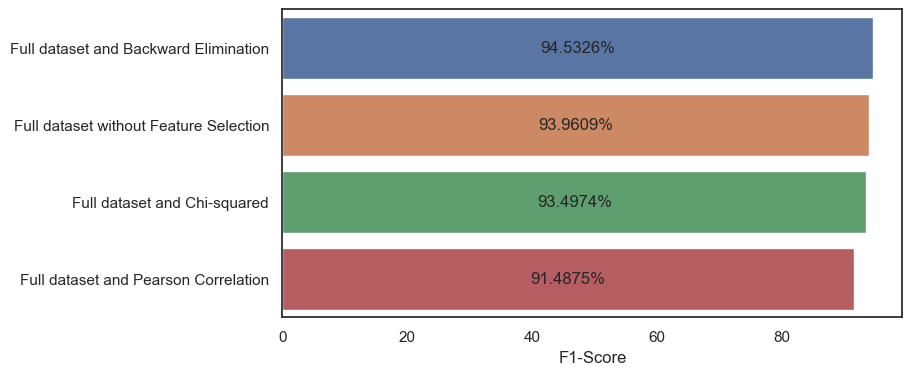

In [43]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style('white')

df_full_sm_merged_plot = df_full_sm_merged.copy()
df_full_sm_merged_plot['Accuracy'] = df_full_sm_merged_plot['Accuracy'].transform(lambda x: x * 100)
df_full_sm_merged_plot['Precision'] = df_full_sm_merged_plot['Precision'].transform(lambda x: x * 100)
df_full_sm_merged_plot['Recall'] = df_full_sm_merged_plot['Recall'].transform(lambda x: x * 100)
df_full_sm_merged_plot['F1-Score'] = df_full_sm_merged_plot['F1-Score'].transform(lambda x: x * 100)

ax = sns.barplot(data=df_full_sm_merged_plot, x=df_full_sm_merged_plot['F1-Score'], y=df_full_sm_merged_plot['Models'], orient='h')
ax.set_ylabel('')

plt.bar_label(ax.containers[0], fmt='%.4f%%', label_type='center')
plt.savefig('./images/result_imbalance.png', bbox_inches='tight')

## Conclusion

The balance dataset and Backward Elimitation Technique produce better results compared to other models.